In [1]:
# get histogram, fit gaussian.

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt # error due to old numpy version being used
import matplotlib
import ROOT as RT
import rootpy.ROOT as rt
import root_numpy as rnp
import pandas as pd

from rootpy.io import root_open
from root_numpy import root2array, tree2array, hist2array
from root_numpy import testdata

from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimization
#from configDzero_pp import fptbinsDN,fptbinsDA,fRebinMass,minf,maxf,fDmesonS,fDmesonSpecie,fbkgtype,fsignaltype fDmass fDsigma
from configDzero_pp import *
from newfunc import *


Welcome to JupyROOT 6.14/04


In [2]:
# Other parameters to pass: 
#--------------------------
# Should find a better way to pass as in a function
#--------------------------------------------------
isRef = 0
fUseRefl = isRef

datafile = '/home/jackbauer/Work/alice/analysis/pp5TeV/D0jet/outData/trial_437.root'
print(datafile)

#signalExtraction.h
#------------------

#------------------
jetmin, jetmax = 0, 50
#print(fptbinsDA)

# 2 ways to plot histogram: 1-ROOT, 2-Python/Matplotlib

#def side_bands(data):
#       print (data)
#       return data
#
#side_bands(5)
#-------------------------------
# Essential functions defined
#-------------------------------
def rawJetSpectra(outdir, prod):
        return 0

def SetReflection(fitter, fLeftFitRange, fRightFitRange, RS, iBin):
        return 0
def SetReflection(fitter, fLeftFitRange, fRightFitRange, RS, ptmin, ptmax):
        return 0
def saveSpectraPlots(fitter, fLeftFitRange, fRightFitRange, RS, iBin):
        return 0
def saveFitParams(outdir, prod):
        return 0
def setHistoDetails(h, scale, color, Mstyle, size):
        width = 2
        if(scale):
                h.Scale(1,"width")
        h.SetMarkerStyle(Mstyle)
        h.SetMarkerColor(color)
        h.SetMarkerSize(size)
        h.SetLineColor(color)
        h.SetLineWidth(width)
        h.SetTitle(0)
        h.GetXaxis().SetTitle(Form("p_{T,%s}(GeV/c)",fDmesonS.Data()))

def SaveCanvas(c, name="tmp"):
        c.SaveAs('%s_pTD%d.png' %(name, fptbinsDA[0]))
        c.SaveAs('%s_pTD%d.pdf' %(name, fptbinsDA[0]))                                                           

/home/jackbauer/Work/alice/analysis/pp5TeV/D0jet/outData/trial_437.root


In [3]:
#------------------------------
# Fitting function python
#------------------------------
def fitter(x, a, b, c):
        return a + b*x + c*x*x
#-------------------------------
# Reading the file
#-------------------------------
File = rt.TFile(datafile,"read")
Dir=File.Get("DmesonsForJetCorrelations")
for i in xrange(0,4):
        #print i
        histlist=Dir.Get("histosD0MBN"+str(i))
        sparse=histlist.FindObject("hsDphiz")
        sparse.GetAxis(0).SetRangeUser(-2.0,2.0)
        sparse.GetAxis(1).SetRangeUser(0,50)
        if(i==0):
                hInvMassptD=sparse.Projection(3,1,2)
                #hInvD=rnp.hist2array(sparse.Projection(3,1,2))
        else:
                hInvMassptD.Add(sparse.Projection(3,1,2))
                #hInvD+=rnp.hist2array(sparse.Projection(3,1,2))

                

In [4]:
# now the real game begins.
#--------------------------
print(massfit)
print(type(hmass))
print(type(hInvMassptD))
hInvMass, edges = rnp.hist2array(hInvMassptD, return_edges=True)


[]
<type 'list'>
<class 'ROOT.TH3D'>


In [5]:
print(hInvMass.shape, len(edges))
edges[0], edges[2]

((280, 50, 100), 3)


(array([1.5   , 1.5025, 1.505 , 1.5075, 1.51  , 1.5125, 1.515 , 1.5175,
        1.52  , 1.5225, 1.525 , 1.5275, 1.53  , 1.5325, 1.535 , 1.5375,
        1.54  , 1.5425, 1.545 , 1.5475, 1.55  , 1.5525, 1.555 , 1.5575,
        1.56  , 1.5625, 1.565 , 1.5675, 1.57  , 1.5725, 1.575 , 1.5775,
        1.58  , 1.5825, 1.585 , 1.5875, 1.59  , 1.5925, 1.595 , 1.5975,
        1.6   , 1.6025, 1.605 , 1.6075, 1.61  , 1.6125, 1.615 , 1.6175,
        1.62  , 1.6225, 1.625 , 1.6275, 1.63  , 1.6325, 1.635 , 1.6375,
        1.64  , 1.6425, 1.645 , 1.6475, 1.65  , 1.6525, 1.655 , 1.6575,
        1.66  , 1.6625, 1.665 , 1.6675, 1.67  , 1.6725, 1.675 , 1.6775,
        1.68  , 1.6825, 1.685 , 1.6875, 1.69  , 1.6925, 1.695 , 1.6975,
        1.7   , 1.7025, 1.705 , 1.7075, 1.71  , 1.7125, 1.715 , 1.7175,
        1.72  , 1.7225, 1.725 , 1.7275, 1.73  , 1.7325, 1.735 , 1.7375,
        1.74  , 1.7425, 1.745 , 1.7475, 1.75  , 1.7525, 1.755 , 1.7575,
        1.76  , 1.7625, 1.765 , 1.7675, 1.77  , 1.7725, 1.775 , 

In [6]:
masshistD = np.zeros([hInvMass.shape[0],hInvMass.shape[2]])
#masshist2Dreb = np.zeros([hInvMass.shape[0], fptbinsDN])
#print[hInvMass.shape[0], fptbinsDN]
for i in xrange(hInvMass.shape[0]): #0th dimension, mass
        for j in xrange(hInvMass.shape[2]): #2nd dimension, D pt
                masshistD[i,j] = sum(hInvMass[i,:,j])
#        masshist1D[i] = masshistD[i,j]
#print(type(masshistD[:,0]), len(masshistD[:,0]))
print(masshistD)
print(masshistD.shape)
#print(type(edges[2]), len(edges[2]))
#print(edges[2])


[[ 0.  1. 21. ...  0.  0.  0.]
 [ 0.  4. 13. ...  0.  0.  0.]
 [ 1.  3. 22. ...  0.  0.  0.]
 ...
 [ 0.  1.  2. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(280, 100)


In [7]:
def bincenter(binedges):
        bincenterarray = np.zeros(len(binedges)-1)
        for i in xrange(len(bincenterarray)):
                bincenterarray[i] = (binedges[i]+binedges[i+1])/2.0
        return bincenterarray        

In [9]:
masshist2Dreb = np.zeros([hInvMass.shape[0], fptbinsDN])
edges[2], fptbinsDA
masshistD[0] + masshistD[1]
#masshistD[0] , masshistD[1]
masshist2Dreb = rebin(masshistD, edges[2], fptbinsDA)
#print(masshist2Dreb.shape, fptbinsDN)
masshist2Dreb

array([[ 94., 122., 146., ..., 188., 188., 188.],
       [ 74., 102., 124., ..., 170., 171., 171.],
       [ 70.,  89., 106., ..., 154., 154., 154.],
       ...,
       [ 10.,  16.,  19., ...,  29.,  29.,  29.],
       [  9.,  15.,  19., ...,  24.,  24.,  24.],
       [ 13.,  18.,  21., ...,  27.,  27.,  27.]])

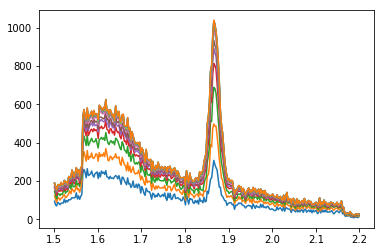

In [12]:
masscenter = bincenter(edges[0])
for i in xrange(fptbinsDN):
    plt.plot(masscenter, masshist2Dreb[:,i])

12
0
1
2
3
4
5
6
7
8
9
10
11


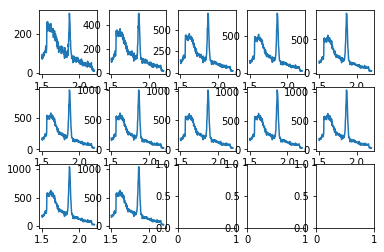

In [16]:
xnx, xny = 3, 5
fig, axs = plt.subplots(xnx, xny)
#plt.subplots_adjust(hspace=0.5)
#print(type(axs[2]))
#print(4)
#print(axs.shape)
#axs = axs.ravel()
item = 0
print(fptbinsDN)
for i in xrange(xnx):
    for j in xrange(xny):
        if (item+j<fptbinsDN):
            print(item+j)
            axs[i][j].plot(masscenter, masshist2Dreb[:,item+j])
    item += xny

In [ ]:

for i in xrange(0,fptbinsDN):
        hh = hInvMassptD.ProjectionX(
                        'hh_%d' %(i),
                        hInvMassptD.GetYaxis().FindBin(jetmin),
                        hInvMassptD.GetYaxis().FindBin(jetmax)-1,
                        hInvMassptD.GetZaxis().FindBin(fptbinsDA[i]),
                        hInvMassptD.GetZaxis().FindBin(fptbinsDA[i+1])-1,
                )
        hh.Rebin(fRebinMass)
        hh.GetXaxis().SetRangeUser(minf,maxf)
        hh.SetTitle('%.1lf < pt^{%s} < %.1lf' %(fptbinsDA[i],fDmesonS,fptbinsDA[i+1]))
        # AliHFInv implementation
        #------------------------
#       hmassfit1D = hh.Clone("hmassfit")
#       hmassfit = RT.TH1F()
#       hmassfit1D.Copy(hmassfit)
#       if(fDmesonSpecie):
#               hmassfit.SetMaximum(hmassfit.GetMaximum()*1.3)
#       hmin = RT.TMath.Max(minf,hmassfit.GetBinLowEdge(2))
#       hmax = RT.TMath.Min(maxf,hmassfit.GetBinLowEdge(hmassfit.GetNbinsX()))

        # Python Numpy/Scipy implementation
        #----------------------------------
        hmassfit = hh.Clone("hmassfit")
        #print(hmassfit)
        #hhpy = rnp.hist2array(hmassfit)
        #print(type(hhpy))
        #print(hhpy)
#       print optimization.curve_fit(fitter, xdata, ydata, )

###     fitterp = RT.AliHFInvMassFitter(hmassfit, hmin, hmax, fbkgtype, fsignaltype) #print (hmassfit)
###     fitterp.SetInitialGaussianMean(fDmass)
###     fitterp.SetInitialGaussianSigma(fDsigma)
###     
###     #if(fUseRefl and fDmesonSpecie == 0):
###             #if(fSystem) SetReflection(fitterp, hmin, hmax, RS, i+firstPtBin) 
###                     #older way from Fabio's templates for p-Pb
###             #else SetReflection(fitterp, hmin, hmax, RS, fptbinsDA[i], fptbinsDA[i+1]) 
###                     #new for pp, new templates from D-jet code
###     
###     fitterp.MassFitter(False) #FIT ERROR
#       
#       h = fitterp.GetHistoClone()
#       #massfit[i] = fitterp.GetMassFunc()
##      print(fitterp.GetMassFunc())
#       massfit.append(fitterp.GetMassFunc())
##      print(massfit[i], type(massfit[i]))
#       massfit[i].SetRange(hmin, hmax)
##      massfit[i].SetLineColor(4)
#       fullfit.append(h.GetFunction("funcmass"))
#       if(fullfit[i]):
#               fullfit[i].SetName('fullfit_%d' %(i))
#       hmass.append(h.Clone('hmass_%d' %(i)))
#       hmass[i].SetName('hmass_%d' %(i))
#       hmass[i].GetYaxis().SetTitle('Entries')
#       hmass[i].GetXaxis().SetTitle('Invariant Mass (GeV/c^{2})')
#       bkgfit.append(fitterp.GetBackgroundRecalcFunc())
#       bkgfit[i].SetRange(hmin, hmax)
#       bkgfit[i].SetLineColor(2)
#       bkgfit[i].SetName('bkgFit_%d' %(i))

#       #if(fUseRefl and fDmesonSpecie == 0):
#       
#       pad = c2.GetPad(i+1)
                                                                                       191,1         97%
